<a href="https://colab.research.google.com/github/liyachittilappilly/python-projects/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

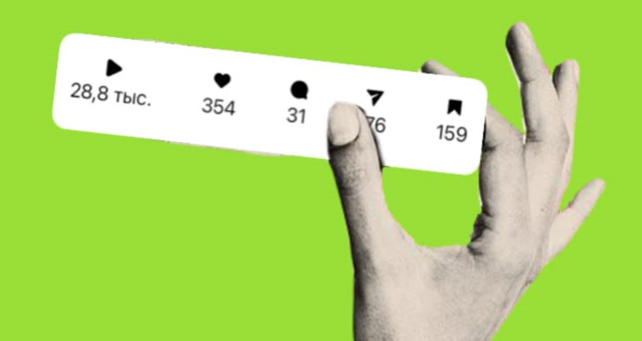

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

d = pd.read_csv('/content/social_media_engagement1.csv')

d = d[['post_id', 'platform', 'post_time', 'likes', 'comments', 'shares', 'post_day', 'sentiment_score']]

In [ ]:
d.head()

,post_id,platform,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [ ]:
d['post_time'] = pd.to_datetime(d['post_time'])
d['post_date'] = d['post_time'].dt.date  # Extract date (without time)

d = d.drop_duplicates().reset_index(drop=True) # Remove duplicate row

d = d.dropna() #remove null val

/tmp/ipython-input-5-1745330218.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


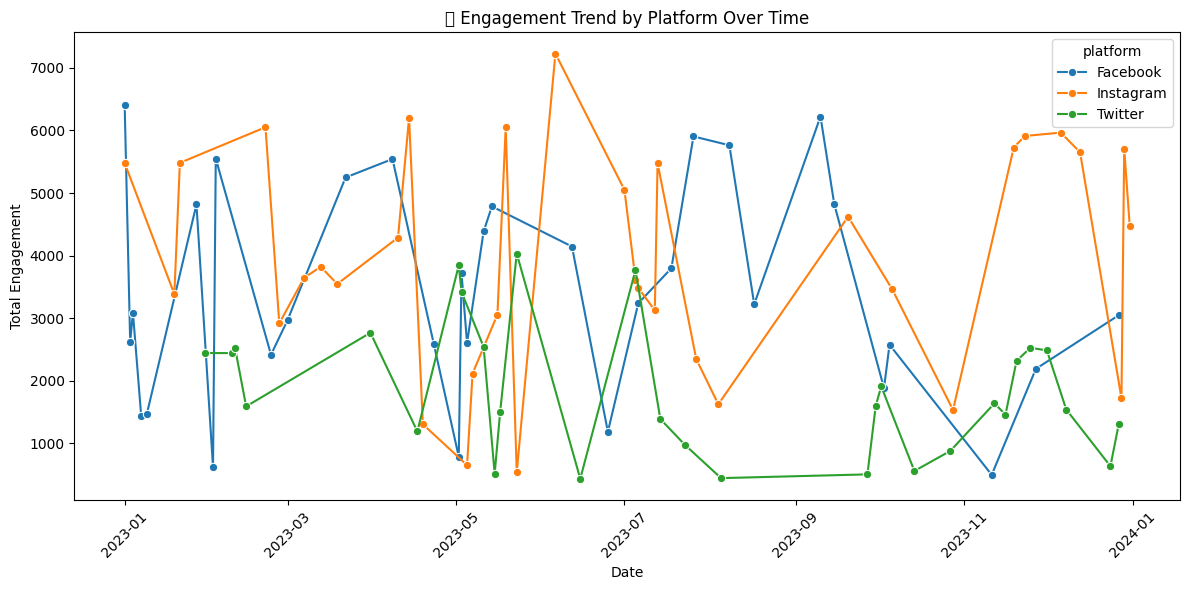

In [ ]:
d['engagement'] = d['likes'] + d['comments'] + d['shares']

# Group by platform and date
daily_engagement = d.groupby(['platform', 'post_date'])['engagement'].sum().reset_index()

# Plot engagement trend per platform
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_engagement, x='post_date', y='engagement', hue='platform', marker='o')
plt.title("📈 Engagement Trend by Platform Over Time")
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Total engagement by platform
platform_totals = daily_engagement.groupby('platform')['engagement'].sum().sort_values(ascending=False)
most_used_app = platform_totals.idxmax()

print(f"🔥 Most used app: {most_used_app}")


🔥 Most used app: Instagram


/tmp/ipython-input-7-644748917.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


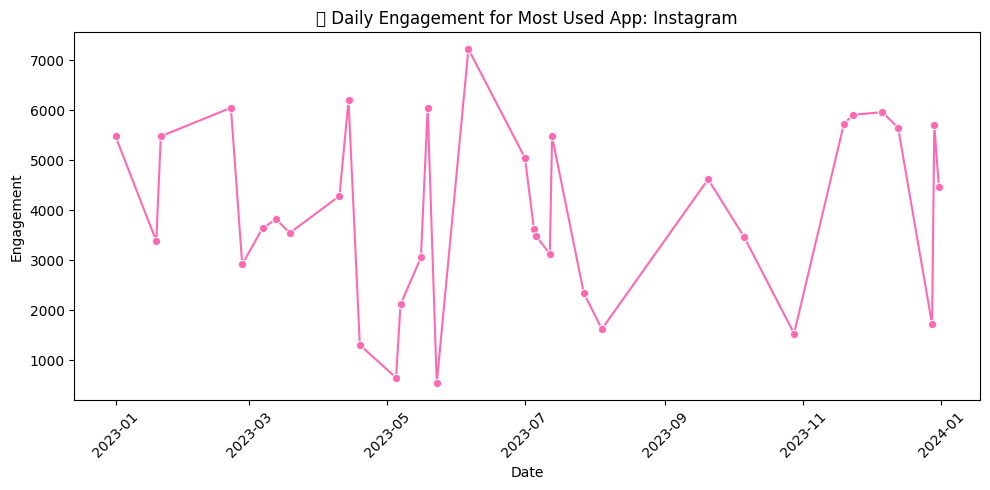

In [ ]:
# Filter only most used app
most_used_data = daily_engagement[daily_engagement['platform'] == most_used_app]

# Plot it
plt.figure(figsize=(10,5))
sns.lineplot(data=most_used_data, x='post_date', y='engagement', marker='o', color='hotpink')
plt.title(f"📊 Daily Engagement for Most Used App: {most_used_app}")
plt.xlabel("Date")
plt.ylabel("Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='post_date', ylabel='engagement'>

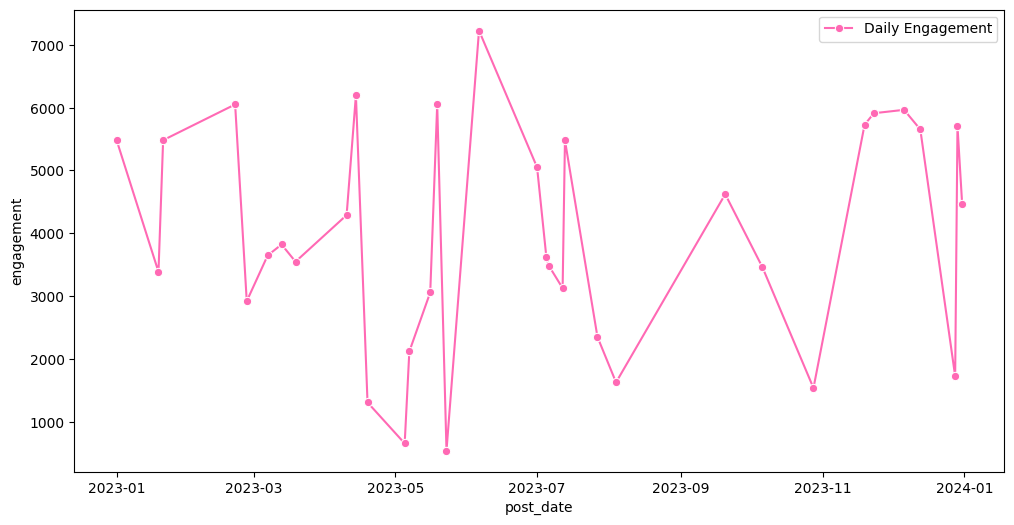

In [ ]:
plt.figure(figsize=(12,6))

# Plot actual daily engagement
sns.lineplot(
    data=most_used_data,
    x='post_date',
    y='engagement',
    label='Daily Engagement',
    color='hotpink',
    marker='o'
)

<Axes: xlabel='post_date', ylabel='rolling_avg'>

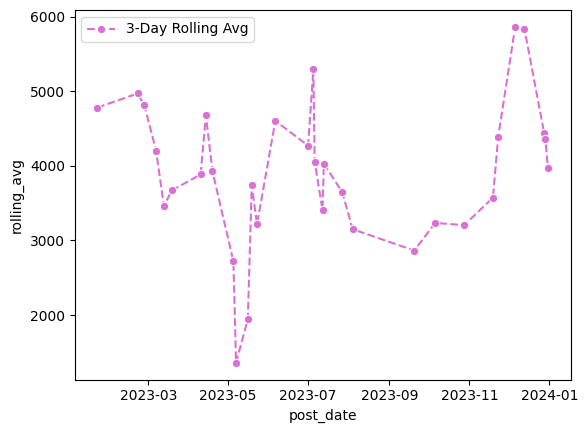

In [ ]:
# Plot 3-day rolling average
sns.lineplot(
    data=most_used_data,
    x='post_date',
    y='rolling_avg',
    label='3-Day Rolling Avg',
    color='orchid',
    linestyle='--',
    marker='o'
)

In [ ]:
# Step 1: Filter data to just the most used platform
sentiment_data = d[d['platform'] == most_used_app].copy()

# Step 2: Create engagement score again (if not already done)
sentiment_data['engagement'] = sentiment_data['likes'] + sentiment_data['comments'] + sentiment_data['shares']

# Step 3: Group by sentiment and calculate total engagement
sentiment_engagement = sentiment_data.groupby('sentiment_score')['engagement'].sum().reset_index()

# Optional: Sort values for clean plotting
sentiment_engagement = sentiment_engagement.sort_values(by='engagement', ascending=False)

/tmp/ipython-input-16-500992044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-16-500992044.py:12: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


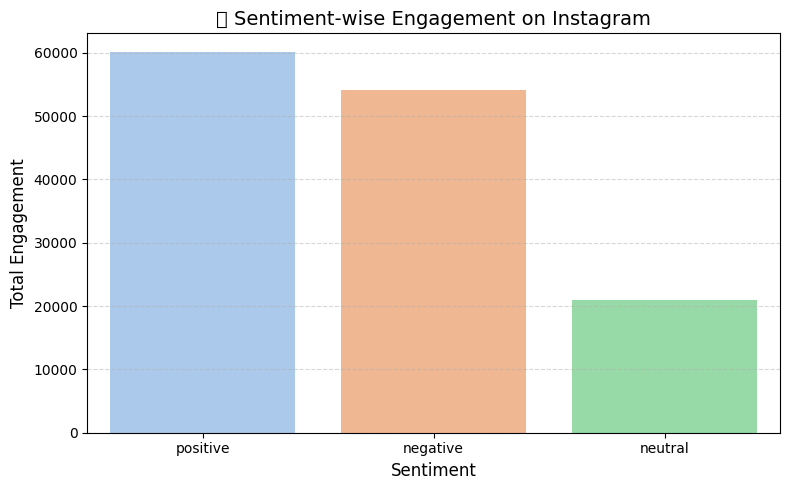

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=sentiment_engagement,
    x='sentiment_score',
    y='engagement',
    palette='pastel'
)
plt.title(f"💬 Sentiment-wise Engagement on {most_used_app}", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Total Engagement", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()